# Exploring dissatisfaction as cause of employee resignation  

# Objectives

We'll analyze existing data about employees from public and private institutions of education in Queensland, Australia.

We are interested in finding out the following questions:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? 
- What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?



## Summary of results



# Exploring the dataset

We'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. 

- (DETE: https://en.wikipedia.org/wiki/Department_of_Education_(Queensland)) 
(TAFE: https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey)

The original TAFE exit survey data is no longer available* 

Dataquest has made some slight modifications to the original datasets to make them easier to work with, including changing the encoding to UTF-8 (the original ones are encoded using cp1252.)



We will first explore the dataset to see if it contains the data we need. To answer the questions of this project we need to focus on employees that resigned to their jobs and search for meaningful data that can show us the following:

Length of the time spent working:
- Short period employees
- Long period employees

Age of employees
- Young employees
- Old employees

Dissatisfaction with the job
- Reason of termination



In [1]:
#Read into the data provided by Dataquest
import pandas as pd
import numpy as np
%matplotlib inline

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

## Exploring data from dete_survey.csv

In [2]:
# Quick exploration of the data
print(dete_survey.info)
print(dete_survey.columns)

<bound method DataFrame.info of       ID                        SeparationType Cease Date DETE Start Date  \
0      1                 Ill Health Retirement    08/2012            1984   
1      2      Voluntary Early Retirement (VER)    08/2012      Not Stated   
2      3      Voluntary Early Retirement (VER)    05/2012            2011   
3      4             Resignation-Other reasons    05/2012            2005   
4      5                        Age Retirement    05/2012            1970   
..   ...                                   ...        ...             ...   
817  819                        Age Retirement    02/2014            1977   
818  820                        Age Retirement    01/2014            1980   
819  821  Resignation-Move overseas/interstate    01/2014            2009   
820  822                 Ill Health Retirement    12/2013            2001   
821  823  Resignation-Move overseas/interstate    12/2013      Not Stated   

    Role Start Date                        

### Selected columns for DETE survey

These are some of the columns that we could use from dete_survey:

- ID: An id used to identify the participant of the survey
- SeparationType: The reason why the person's employment ended
- Cease Date: The year or month the person's employment ended
- DETE Start Date: The year the person began employment with the DETE

In [3]:
# Sample of the selected columns in the DETE survey
print(dete_survey[['ID',
                   'SeparationType',
                   'Cease Date', 
                   'DETE Start Date']].head(5))

   ID                    SeparationType Cease Date DETE Start Date
0   1             Ill Health Retirement    08/2012            1984
1   2  Voluntary Early Retirement (VER)    08/2012      Not Stated
2   3  Voluntary Early Retirement (VER)    05/2012            2011
3   4         Resignation-Other reasons    05/2012            2005
4   5                    Age Retirement    05/2012            1970


In [4]:
# Reasons of termination
dete_survey['SeparationType'].value_counts(normalize=True, sort=True)*100

Age Retirement                          34.671533
Resignation-Other reasons               18.248175
Resignation-Other employer              11.070560
Resignation-Move overseas/interstate     8.515815
Voluntary Early Retirement (VER)         8.150852
Ill Health Retirement                    7.420925
Other                                    5.961071
Contract Expired                         4.136253
Termination                              1.824818
Name: SeparationType, dtype: float64

The most common reason for termination is age retirement, followed by resignation. There are 3 values that indicate employee resignation, which represent a high % of job termination (37,7%). 

In [5]:
dete_survey['DETE Start Date'].value_counts()


Not Stated    73
2011          40
2007          34
2008          31
2010          27
2012          27
2009          24
2006          23
2013          21
1970          21
1975          21
2005          20
1990          20
1999          19
1996          19
2004          18
1992          18
2000          18
1991          18
1989          17
1976          15
1978          15
2003          15
2002          15
1988          15
1995          14
1998          14
1997          14
1974          14
1980          14
1979          14
1993          13
1986          12
1972          12
1977          11
1994          10
1969          10
1984          10
1971          10
2001          10
1981           9
1983           9
1985           8
1973           8
1987           7
1982           4
1963           4
1968           3
1967           2
1965           1
1966           1
Name: DETE Start Date, dtype: int64

In [6]:
dete_survey[['ID',
             'SeparationType',
             'Cease Date', 
             'DETE Start Date'
            ]].isnull().sum()

ID                 0
SeparationType     0
Cease Date         0
DETE Start Date    0
dtype: int64

### Observations from DETE survey
Many of the employees in this survey resigned from their jobs (37,7%)
The values from SeparationType column that we are interested in are the ones that indicate resignation. 
To obtain a period of time working from each employee, we will need to calculate a value from 'Cease Date' and 'DETE Start Date'
Start date are years as strings because it has other values, like 'Not stated' which should be NaN


## Exploring data from tafe_survey.csv

In [7]:
# Quick exploration of the data
print(tafe_survey.columns)
print(tafe_survey.info)

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate oppo

## Selected columns for TAFE survey

These are some of the columns that we could use from dete_survey:

- Record ID: An id used to identify the participant of the survey
- Reason for ceasing employment: The reason why the person's employment ended
- LengthofServiceOverall. Overall Length of Service at Institute (in years):The length of the person's employment (in years)

In [8]:
# Sample for columns selected
print(tafe_survey[['Record ID', 
                   'Reason for ceasing employment', 
                   'LengthofServiceOverall. Overall Length of Service at Institute (in years)'
                  ]]) 

        Record ID Reason for ceasing employment  \
0    6.341330e+17              Contract Expired   
1    6.341337e+17                    Retirement   
2    6.341388e+17                    Retirement   
3    6.341399e+17                   Resignation   
4    6.341466e+17                   Resignation   
..            ...                           ...   
697  6.350668e+17                   Resignation   
698  6.350677e+17                   Resignation   
699  6.350704e+17                   Resignation   
700  6.350712e+17              Contract Expired   
701  6.350730e+17                   Resignation   

    LengthofServiceOverall. Overall Length of Service at Institute (in years)  
0                                                  1-2                         
1                                                  NaN                         
2                                                  NaN                         
3                                                  NaN             

In [9]:
# Value counts of  Reason for ceasing employment
tafe_survey['Reason for ceasing employment'].value_counts(normalize=True)*100

Resignation                 48.502140
Contract Expired            18.116976
Retrenchment/ Redundancy    14.835949
Retirement                  11.697575
Transfer                     3.566334
Termination                  3.281027
Name: Reason for ceasing employment, dtype: float64

The most common reason for termination is Resignation, which represents a high % of job termination (48,5%).

In [10]:
# Null values in selected columns
tafe_survey[['Record ID', 
             'Reason for ceasing employment', 
             'LengthofServiceOverall. Overall Length of Service at Institute (in years)'
            ]].isnull().sum()

Record ID                                                                      0
Reason for ceasing employment                                                  1
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
dtype: int64

In [11]:
# Value counts of  length of service
tafe_survey['LengthofServiceOverall. Overall Length of Service at Institute (in years)'].value_counts()

Less than 1 year      147
1-2                   102
3-4                    96
11-20                  89
More than 20 years     71
5-6                    48
7-10                   43
Name: LengthofServiceOverall. Overall Length of Service at Institute (in years), dtype: int64

The values form this column shows periods of time as categories that will need sorting. 

## Observations

TAFE 'lenght of service' is represented by periods of time that can be compared to the combination of begin and start date from DETE survey. 

We have a few missing values that we need to adress

# Cleaning datasets

To answer the questions for this project, we have been asked to combine the results for both surveys . However, although both used the same survey template, one of them customized some of the answers (DETE), so we'll use that one as our reference template for cleaning both datasets. 

For this, we need to clean both datasets separatedly for combining them later based on our observations:

1. Change 'Not Stated' to NaN values in DETE survey
2. Drop unneccessary columns in both surveys
3. Change columns names in DETE (main columns) and TAFE surveys





In [12]:
# Read the dete_survey again to include 'Not stated' as NaN
dete_survey = pd.read_csv('dete_survey.csv', na_values=['Not Stated'])


In [13]:
# Drop unneccessary columns in DETE survey
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)

In [14]:
# Drop unneccessary columns in TAFE survey
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)


In [15]:
#Clean column names in DETE survey 
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')


In [16]:
#Change column names in TAFE survey to match the ones in DETE survey
tafe_survey_updated = tafe_survey_updated.rename(columns={'Record ID':'id',
                                                'CESSATION YEAR':'cease_date',
                                                'Reason for ceasing employment':'separationtype',
                                                'Gender. What is your Gender?':'gender',
                                                 'CurrentAge. Current Age':'age',
                                                 'Employment Type. Employment Type':'employment_status',
                                                 'Classification. Classification':'position',
                                                 'LengthofServiceOverall. Overall Length of Service at Institute (in years)':'institute_service',
                                                 'LengthofServiceCurrent. Length of Service at current workplace (in years)':'role_service'
                                                         })

In [17]:
#Making sure every change looks good
print(dete_survey_updated.head(5))


   id                    separationtype cease_date  dete_start_date  \
0   1             Ill Health Retirement    08/2012           1984.0   
1   2  Voluntary Early Retirement (VER)    08/2012              NaN   
2   3  Voluntary Early Retirement (VER)    05/2012           2011.0   
3   4         Resignation-Other reasons    05/2012           2005.0   
4   5                    Age Retirement    05/2012           1970.0   

   role_start_date                                      position  \
0           2004.0                                Public Servant   
1              NaN                                Public Servant   
2           2011.0                               Schools Officer   
3           2006.0                                       Teacher   
4           1989.0  Head of Curriculum/Head of Special Education   

  classification              region                      business_unit  \
0        A01-A04      Central Office  Corporate Strategy and Peformance   
1        AO5-A

In [18]:
#Making sure every change looks good
print(tafe_survey_updated.head(5))

             id                              Institute  \
0  6.341330e+17  Southern Queensland Institute of TAFE   
1  6.341337e+17            Mount Isa Institute of TAFE   
2  6.341388e+17            Mount Isa Institute of TAFE   
3  6.341399e+17            Mount Isa Institute of TAFE   
4  6.341466e+17  Southern Queensland Institute of TAFE   

                   WorkArea  cease_date    separationtype  \
0  Non-Delivery (corporate)      2010.0  Contract Expired   
1  Non-Delivery (corporate)      2010.0        Retirement   
2       Delivery (teaching)      2010.0        Retirement   
3  Non-Delivery (corporate)      2010.0       Resignation   
4       Delivery (teaching)      2010.0       Resignation   

  Contributing Factors. Career Move - Public Sector   \
0                                                NaN   
1                                                  -   
2                                                  -   
3                                                  -   
4   

# Filter data

## Select only employees thet resigned
We will continue to remove more data that we dont need. 
For this specific project, we will only analyze those employees that resigned, so we will only consider the 'Resignation' values in separation type.

In [19]:
print(dete_survey_updated['separationtype'].value_counts())
print(tafe_survey_updated['separationtype'].value_counts())

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


In [20]:
#Create a copy of the dataset and select only the rows of the employees that resigned
dete_resignations = dete_survey_updated.copy()
dete_resignations = dete_resignations[(dete_resignations['separationtype'] == 'Resignation-Other reasons') 
                                      | (dete_resignations['separationtype'] == 'Resignation-Other employer')
                                      | (dete_resignations['separationtype'] == 'Resignation-Move overseas/interstate')
                                     ] 

In [21]:
#Create a copy of the dataset and select only the rows of the employees that resigned
tafe_resignations = tafe_survey_updated.copy()
tafe_resignations = tafe_resignations[tafe_resignations['separationtype'] == 'Resignation']

## Check cease dates of DETE employee resignations

Since we need specific time periods of working employees, we will analyze the dates start and cease date from DETE survey to see if any of them have any logical inconsistencies and then clean them as numbers that can be used to calculate years of service


In [22]:
print(dete_resignations['cease_date'].value_counts())

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
07/2006      1
2010         1
09/2010      1
Name: cease_date, dtype: int64


In [23]:
# Convert to strings for extracting years
years = dete_resignations['cease_date'].astype(str).str.extract(r"(?P<years>[1-2][0-9][0-9][0-9])")
dete_resignations['cease_date'] = years.astype(float)
print(dete_resignations['cease_date'])

3      2012.0
5      2012.0
8      2012.0
9      2012.0
11     2012.0
        ...  
808    2013.0
815    2014.0
816    2014.0
819    2014.0
821    2013.0
Name: cease_date, Length: 311, dtype: float64


In [24]:
#Checking the values from DETE resignations
print(dete_resignations['cease_date'].value_counts())
print(dete_resignations['dete_start_date'].value_counts().sort_index())

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64
1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64


In [25]:
#Checking the values from TAFE resignations
print(tafe_resignations['cease_date'].value_counts())


2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64


## Create new column for years of service
There doesnt seem to be any inconsistencies with the data, so we proceed to create a new column for years of service in the DETE survey. In this column we will calculate the years of service from the start and end date of their service.



In [26]:
# New column with years of service
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations['institute_service'].notnull().value_counts()

True     273
False     38
Name: institute_service, dtype: int64

##  Identify Dissatisfied Employees

Now we'll identify any employees who resigned because some kind of dissatisfaction. 

Several columns in the DETE SURVEY have boolean values which reveal some kind of dissatisfaction. If the employee marked any of these as true, it will indicate a dissatisfaction with the job so so we will assign true to a new column called 'dissatisfaction'.



In [27]:
# Identify any True vales in each column of DETE survey to assign boolean in new column
dete_resignations['dissatisfied'] = dete_resignations[['dissatisfaction_with_the_department',
                                                      'physical_work_environment',
                                                      'lack_of_recognition',
                                                      'lack_of_job_security',
                                                      'work_location',
                                                      'employment_conditions',
                                                      'work_life_balance',
                                                      'workload']].any(1, skipna=False)



In [28]:
#Copy df to avoid errors and analize results
dete_resignations_up = dete_resignations.copy()
print(dete_resignations_up['dissatisfied'].value_counts())

False    169
True     142
Name: dissatisfied, dtype: int64


### TEFE survey 
There are two columns in tafe_survey that give us information about dissatisfaction. We need to create a new column that states if any of these columns state that there was a dissatisfaction.
- Contributing Factors. Dissatisfaction
- Contributing Factors. Job Dissatisfaction

In [29]:
# Analize the values of these columns
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts())
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts())

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64
-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


The "-" values indicate a false, while the same name of the column indicates true. We need to change this to boolean values that we can operate with.

In [30]:
def update_vals(val):
    
    if val == '-':
        return False
    elif pd.isnull(val):
        return np.NaN   
    else:
        return True



In [31]:
#Apply the function to each column from TAFE survey to obtain boolean values
tafe_resignations['Contributing Factors. Dissatisfaction'] = tafe_resignations['Contributing Factors. Dissatisfaction'].apply(func=update_vals)
tafe_resignations['Contributing Factors. Job Dissatisfaction'] = tafe_resignations['Contributing Factors. Job Dissatisfaction'].apply(func=update_vals)

# Analize the values of these columns
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts())
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts())

False    277
True      55
Name: Contributing Factors. Dissatisfaction, dtype: int64
False    270
True      62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [32]:
#Apply "any" method to identify any True value to define the new column dissatisfied
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].any(1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()
print(tafe_resignations_up['dissatisfied'].value_counts())


False    241
True      91
Name: dissatisfied, dtype: int64


There is a simpler alternative to do this:

tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()

# Combine data from both surveys

Now that we have cleaned both surveys we can proceed to combine them and analize the data.

In [33]:
# Add new columns with the name of the survey in every row to keep track of the source
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'


In [34]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up])
print(combined.notnull().sum().sort_values())

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
none_of_the_above                                      311
work_life_balance                                      311
traumatic_incident                                     311
ill_health                                             311
study/travel                                           311
relocation                                             3

Since both surveys have around 300 rows, we can easily recognize at a glance that the columns that have enough values from both surveys have around 600 values. Because of this, we can drop the other columns that have significantly less data. 

In [35]:
# We drop all columns that have less than 500 non null values
combined_updated = combined.dropna(axis=1, thresh=500).copy()

In [36]:
#Final columns with enough values for analysis
combined_updated.columns

Index(['id', 'separationtype', 'cease_date', 'position', 'employment_status',
       'gender', 'age', 'institute_service', 'dissatisfied', 'institute'],
      dtype='object')

## Clean the service column

We still have a lot of different values that indicate the years of service and we need to clean them for further analysis. 

In [37]:
combined_updated['institute_service'] = combined_updated['institute_service'].astype('str')
combined_updated['institute_service'].value_counts()

nan                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
17.0                   6
10.0                   6
14.0                   6
12.0                   6
22.0                   6
16.0                   5
18.0                   5
23.0                   4
11.0                   4
24.0                   4
32.0                   3
19.0                   3
21.0                   3
39.0                   3
26.0                   2
25.0                   2
28.0                   2
36.0                   2
30.0                   2


In [39]:
#Extract from string values
strings_change = combined_updated['institute_service'].str

combined_updated['institute_service'] = combined_updated['institute_service'].str.extract(r'(\d+)')
combined_updated['institute_service'] = combined_updated['institute_service'].astype(float)
combined_updated['institute_service'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service, dtype: int64

We extract the words from the values. For those values that indicate a range of years we can keep just one of the years that state the range because we will reclassify them into another range that includes both values.

The new ranges are as follows: 
- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company


In [40]:
# New function to recalssify years of service according to  year range
def career(yrs):
    if (yrs < 3):
        return 'new'
    elif (yrs >= 3) & (yrs < 7):
        return 'experienced'
    elif (yrs >= 7) & (yrs < 11):
        return 'established'
    elif (yrs >= 11):
        return 'veteran'
    elif pd.isnull(yrs):
        return np.NaN 

In [41]:
combined_updated['service_cat'] = combined_updated['institute_service'].apply(career)
print(combined_updated['service_cat'].value_counts())

new            193
experienced    172
veteran        136
established     62
Name: service_cat, dtype: int64


# Initial Analysis

Now that we have cleaned our dataset and created a new combined dataset from both surveys, we can proceed to analyse the data and answer the initial questions of the project. 

In [42]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    410
True     233
NaN        8
Name: dissatisfied, dtype: int64

In [51]:
# Fill the NaN values with the most recurrent value, in this case, False
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)
print(combined_updated['dissatisfied'].value_counts(dropna=False, normalize=True))
print(combined_updated['dissatisfied'].value_counts(dropna=False))

False    0.642089
True     0.357911
Name: dissatisfied, dtype: float64
False    418
True     233
Name: dissatisfied, dtype: int64


From all the employees that resigned, 35% of them resigned because of some kind of dissatisfaction with the job. 

In [52]:
#Create pivot table to show the mean between dissatisfaction and years of service
piv = pd.pivot_table(data=combined_updated, values='dissatisfied', index='service_cat')
print(piv.sort_values(by='dissatisfied', ascending=False))

             dissatisfied
service_cat              
established      0.500000
veteran          0.470588
experienced      0.325581
new              0.290155


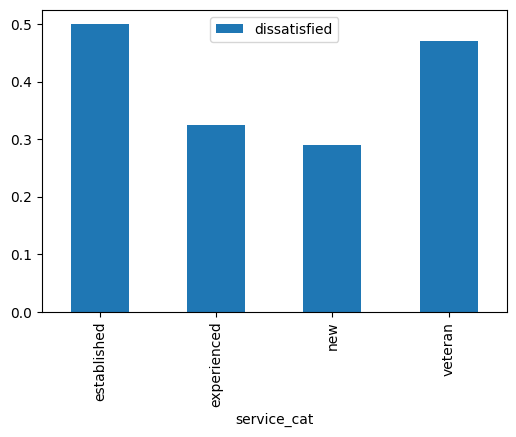

In [49]:
piv.plot(kind='bar')

## Conclusions
From all the employees that resigned, 35% of them resigned because of some kind of dissatisfaction with the job. 

From that 35% of the employees that resigned because of some kind of dissatisfaction, we can see that there are employees who have been working for  for long periods of time and short periods of time as well.

It is more likely that a veteran or established employees will resign because of some sort of dissatisfaction.



## Next steps

Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction?

What about employees who have been there longer?



Are younger employees resigning due to some kind of dissatisfaction? What about older employees?